In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

df = pd.read_csv('/content/drive/MyDrive/Shell_ai/dataset/train/train.csv')
df

,DATE (MM/DD),MST,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Total Cloud Cover [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],Precipitation (Accumulated) [mm],Snow Depth [cm],Moisture,Albedo (CMP11)
0,1/1,00:00,-0.962276,0.000000,356.85640,7.216,0.988,-7.312,32.33,-1,9.95,271.3,806.779,0.0,0.219,0.0,0.0
1,1/1,00:01,-0.937921,0.000000,357.65505,7.251,1.040,-7.260,32.40,-1,8.20,272.9,806.840,0.0,0.206,0.0,0.0
2,1/1,00:02,-0.944395,0.000000,358.45438,7.256,1.093,-7.207,32.54,-1,6.70,288.8,806.876,0.0,0.148,0.0,0.0
3,1/1,00:03,-0.951350,-0.029673,359.25416,7.254,1.060,-7.440,31.89,-1,7.70,294.0,806.823,0.0,0.235,0.0,0.0
4,1/1,00:04,-0.934976,-0.054401,0.05415,7.331,1.081,-7.419,31.78,-1,7.20,285.5,806.762,0.0,0.182,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527035,12/31,23:55,-1.360910,-0.340704,352.62902,-0.469,-3.940,-10.140,43.61,-1,0.00,0.0,816.186,0.0,2.899,0.0,0.0
527036,12/31,23:56,-1.342520,-0.325891,353.41779,-0.499,-3.927,-10.127,43.77,-1,0.00,0.0,816.185,0.0,2.866,0.0,0.0
527037,12/31,23:57,-1.341260,-0.320952,354.20842,-0.522,-3.958,-10.158,43.73,-1,0.00,0.0,816.198,0.0,2.882,0.0,0.0
527038,12/31,23:58,-1.334130,-0.320953,355.00071,-0.558,-3.979,-10.079,44.17,-1,0.00,0.0,816.194,0.0,2.805,0.0,0.0


##Data Cleaning and Analysis 

In [3]:
# df.describe().transpose()

In [4]:
# df.info()

In [5]:
df['Snow Depth [cm]'].replace(-7999, np.NaN, inplace  = True)
df['Snow Depth [cm]'].fillna(method="ffill", inplace=True)

In [6]:
df['day'] = np.array([[day for i in range(1440)] for day in range(1, 367)]).flatten()

In [7]:
df.drop(['DATE (MM/DD)'], axis = 1, inplace = True)

In [8]:
df

,MST,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Total Cloud Cover [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],Precipitation (Accumulated) [mm],Snow Depth [cm],Moisture,Albedo (CMP11),day
0,00:00,-0.962276,0.000000,356.85640,7.216,0.988,-7.312,32.33,-1,9.95,271.3,806.779,0.0,0.219,0.0,0.0,1
1,00:01,-0.937921,0.000000,357.65505,7.251,1.040,-7.260,32.40,-1,8.20,272.9,806.840,0.0,0.206,0.0,0.0,1
2,00:02,-0.944395,0.000000,358.45438,7.256,1.093,-7.207,32.54,-1,6.70,288.8,806.876,0.0,0.148,0.0,0.0,1
3,00:03,-0.951350,-0.029673,359.25416,7.254,1.060,-7.440,31.89,-1,7.70,294.0,806.823,0.0,0.235,0.0,0.0,1
4,00:04,-0.934976,-0.054401,0.05415,7.331,1.081,-7.419,31.78,-1,7.20,285.5,806.762,0.0,0.182,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527035,23:55,-1.360910,-0.340704,352.62902,-0.469,-3.940,-10.140,43.61,-1,0.00,0.0,816.186,0.0,2.899,0.0,0.0,366
527036,23:56,-1.342520,-0.325891,353.41779,-0.499,-3.927,-10.127,43.77,-1,0.00,0.0,816.185,0.0,2.866,0.0,0.0,366
527037,23:57,-1.341260,-0.320952,354.20842,-0.522,-3.958,-10.158,43.73,-1,0.00,0.0,816.198,0.0,2.882,0.0,0.0,366
527038,23:58,-1.334130,-0.320953,355.00071,-0.558,-3.979,-10.079,44.17,-1,0.00,0.0,816.194,0.0,2.805,0.0,0.0,366


In [9]:
grouped_df = df.groupby(['day'], sort = False, as_index = False)
grouped_df.first()

,day,MST,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Total Cloud Cover [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],Precipitation (Accumulated) [mm],Snow Depth [cm],Moisture,Albedo (CMP11)
0,1,00:00,-0.962276,0.000000,356.85640,7.216,0.988,-7.312,32.33,-1,9.95,271.30,806.779,0.000,0.219,0.0,0.0
1,2,00:00,-0.919309,-0.163202,356.49384,3.508,-1.919,-10.919,30.43,-1,11.45,265.80,800.372,0.000,0.318,0.0,0.0
2,3,00:00,-0.840469,0.089019,356.14060,0.137,-4.331,-13.731,30.03,-1,5.45,300.00,813.182,0.000,0.332,0.0,0.0
3,4,00:00,-0.969991,-0.182984,355.79734,5.818,-0.038,-8.538,31.98,-1,5.70,295.10,819.158,0.000,0.323,0.0,0.0
4,5,00:00,-0.861170,-0.361021,355.46466,7.607,0.486,-10.614,23.52,-1,11.20,269.10,818.427,0.000,0.285,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,362,00:00,-1.059090,-0.187632,358.47767,3.608,-0.659,-6.459,44.75,-1,6.20,290.80,810.515,0.000,0.416,0.0,0.0
362,363,00:00,-1.018440,0.079003,358.08685,-1.373,-3.586,-7.186,60.97,-1,4.20,26.31,817.811,0.000,0.393,0.0,0.0
363,364,00:00,-1.262280,-0.049377,357.70182,-3.414,-3.644,-4.044,94.80,-1,0.00,0.00,808.972,0.000,1.711,1.0,0.0
364,365,00:00,-1.212080,-0.192571,357.32339,-7.285,-8.745,-12.245,64.37,-1,2.20,242.60,816.616,5.842,4.087,0.0,0.0


In [10]:
indexes = np.array([])
for name,group in grouped_df:
  a = group['Total Cloud Cover [%]']
  indexes = np.append(indexes,list(range(group[a>0].index[0],group[a>0].index[-1] + 1)))

In [11]:
cleaned_df = df.loc[indexes.astype('int64')]

In [12]:
cleaned_df = cleaned_df.reset_index(drop=True)
cleaned_df.head()

,MST,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Total Cloud Cover [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],Precipitation (Accumulated) [mm],Snow Depth [cm],Moisture,Albedo (CMP11),day
0,07:47,14.4935,0.079127,123.84491,6.933,1.403,-5.597,38.24,6,0.7,210.3,802.042,0.0,0.032,0.0,0.1951,1
1,07:48,16.5178,-0.034618,124.01096,6.793,1.294,-5.606,38.58,8,0.7,232.2,801.948,0.0,0.029,0.0,0.1867,1
2,07:49,18.6171,-0.153309,124.17734,6.674,1.260,-5.540,39.12,10,1.7,263.9,801.940,0.0,0.173,0.0,0.1783,1
3,07:50,20.5986,-0.143419,124.34405,6.646,1.306,-5.494,39.35,13,2.2,277.5,801.927,0.0,0.144,0.0,0.1758,1
4,07:51,22.4362,-0.079128,124.51110,6.676,1.316,-5.384,39.64,15,2.2,233.4,801.829,0.0,0.355,0.0,0.1765,1


In [13]:
grouped_cleaned_df = cleaned_df.groupby('day', sort = False)
grouped_cleaned_df.get_group(52).head()

,MST,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Total Cloud Cover [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],Precipitation (Accumulated) [mm],Snow Depth [cm],Moisture,Albedo (CMP11),day
28518,07:08,47.2362,407.971,106.73245,-0.830,-5.710,-18.510,20.79,2,3.20,272.0,823.115,0.0,11.69,0.0,0.8679,52
28519,07:09,50.0642,422.240,106.89540,-0.679,-5.570,-18.670,20.22,2,3.45,268.1,823.124,0.0,11.64,0.0,0.8633,52
28520,07:10,52.9976,436.138,107.05857,-0.567,-5.430,-18.230,20.89,2,3.70,266.5,823.147,0.0,11.58,0.0,0.8599,52
28521,07:11,55.9316,449.813,107.22195,-0.578,-5.485,-18.085,21.20,2,3.45,278.2,823.157,0.0,11.45,0.0,0.8554,52
28522,07:12,58.9738,463.930,107.38555,-0.690,-5.501,-17.801,21.98,2,3.20,277.2,823.140,0.0,11.48,0.0,0.8492,52


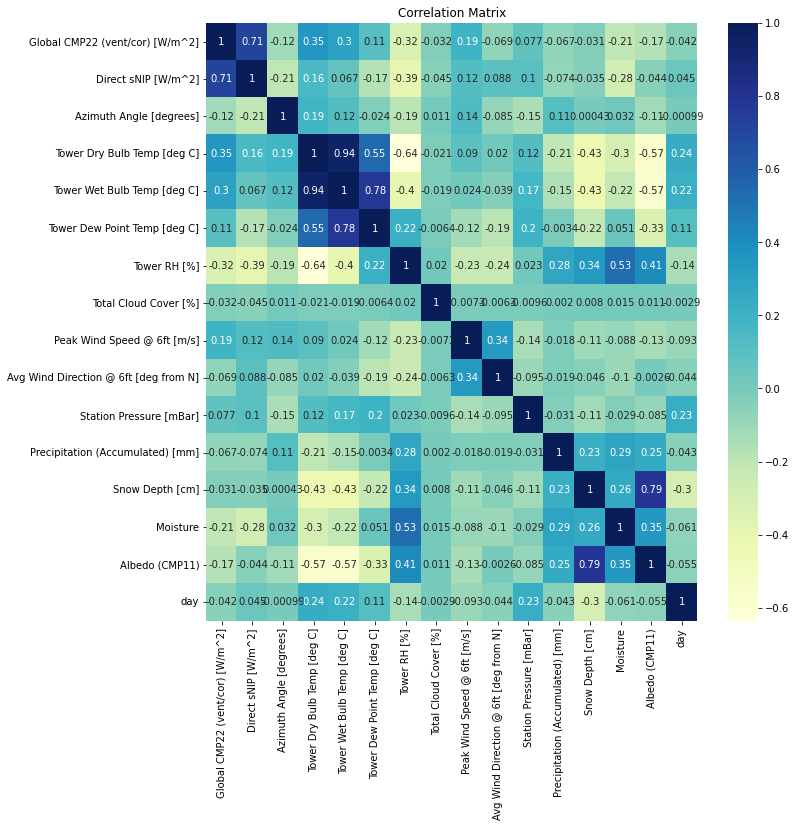

In [14]:
# Plotting correlation between every pair of columns
plt.rcParams['figure.figsize'] = [11, 11]
sns.heatmap(cleaned_df.corr(),annot = True,cmap = "YlGnBu")
plt.title('Correlation Matrix')
plt.show()

In [15]:
cleaned_df[cleaned_df['Total Cloud Cover [%]'] == -1].head()

,MST,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Total Cloud Cover [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],Precipitation (Accumulated) [mm],Snow Depth [cm],Moisture,Albedo (CMP11),day
29127,17:17,22.3465,42.02140,252.78436,10.290,1.419,-13.181,15.56,-1,1.95,104.9,819.792,0.0,9.040,0.0,0.3452,52
29128,17:18,20.3075,5.49932,252.94834,10.250,1.317,-13.583,15.04,-1,1.20,109.5,819.803,0.0,9.100,0.0,0.3066,52
29129,17:19,19.6916,4.25804,253.11210,10.220,1.353,-13.247,15.54,-1,1.70,104.5,819.822,0.0,8.990,0.0,0.3170,52
54548,06:14,15.6567,6.94346,88.04005,5.858,0.488,-6.812,37.08,-1,2.70,276.6,817.324,0.0,0.627,0.0,0.1675,91
54549,06:15,16.0160,4.99989,88.19920,5.657,0.424,-6.776,37.72,-1,1.95,285.1,817.342,0.0,0.659,0.0,0.1598,91


In [16]:
cleaned_df.head()

,MST,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Total Cloud Cover [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],Precipitation (Accumulated) [mm],Snow Depth [cm],Moisture,Albedo (CMP11),day
0,07:47,14.4935,0.079127,123.84491,6.933,1.403,-5.597,38.24,6,0.7,210.3,802.042,0.0,0.032,0.0,0.1951,1
1,07:48,16.5178,-0.034618,124.01096,6.793,1.294,-5.606,38.58,8,0.7,232.2,801.948,0.0,0.029,0.0,0.1867,1
2,07:49,18.6171,-0.153309,124.17734,6.674,1.260,-5.540,39.12,10,1.7,263.9,801.940,0.0,0.173,0.0,0.1783,1
3,07:50,20.5986,-0.143419,124.34405,6.646,1.306,-5.494,39.35,13,2.2,277.5,801.927,0.0,0.144,0.0,0.1758,1
4,07:51,22.4362,-0.079128,124.51110,6.676,1.316,-5.384,39.64,15,2.2,233.4,801.829,0.0,0.355,0.0,0.1765,1


In [17]:
cleaned_df[cleaned_df['Total Cloud Cover [%]'] < 0]['Total Cloud Cover [%]'].value_counts()

-7999    1527
-1        134
-6999       2
Name: Total Cloud Cover [%], dtype: int64

In [18]:
cleaned_df['Total Cloud Cover [%]'].replace(-7999, np.NaN, inplace  = True)
cleaned_df['Total Cloud Cover [%]'].replace(-1, np.NaN, inplace  = True)
cleaned_df['Total Cloud Cover [%]'].replace(-6999, np.NaN, inplace  = True)

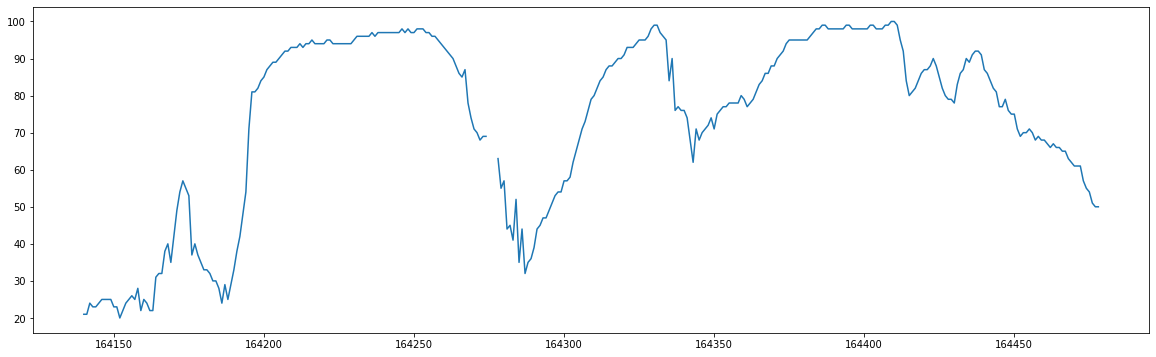

In [19]:
#Visualization
mpl.rcParams['figure.figsize'] = (20, 6)
cleaned_df[cleaned_df['day'] ==  225][450:]['Total Cloud Cover [%]'].plot()

In [20]:
cleaned_df.loc[74473:74483]

,MST,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Total Cloud Cover [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],Precipitation (Accumulated) [mm],Snow Depth [cm],Moisture,Albedo (CMP11),day
74473,12:16,427.237,7.68057,189.71923,20.28,8.318,-3.862,18.59,91.0,1.70,25.59,815.888,0.0,1.146,0.0,0.1742,117
74474,12:17,531.430,77.93350,190.26402,20.28,8.139,-4.261,17.97,92.0,0.00,0.00,815.885,0.0,1.032,0.0,0.1685,117
74475,12:18,508.161,42.49300,190.80757,20.30,8.229,-4.071,18.24,93.0,0.00,0.00,815.885,0.0,1.157,0.0,0.1639,117
74476,12:19,777.916,339.02800,191.34983,20.43,8.721,-2.769,20.20,95.0,1.95,50.64,815.872,0.0,1.216,0.0,0.1726,117
74477,12:20,585.285,118.68500,191.89074,20.66,8.689,-3.111,19.35,94.0,2.70,62.12,815.843,0.0,1.317,0.0,0.1816,117
74478,12:21,509.987,72.03310,192.43023,20.72,8.524,-3.676,18.38,93.0,2.70,81.90,815.840,0.0,1.044,0.0,0.1719,117
74479,12:22,456.900,37.77960,192.96827,20.61,8.965,-2.135,21.07,94.0,2.95,52.58,815.824,0.0,1.182,0.0,0.1696,117
74480,12:23,697.255,285.22000,193.50478,20.62,8.714,-2.886,19.77,94.0,2.95,9.73,815.818,0.0,1.013,0.0,0.1691,117
74481,12:24,452.049,55.17850,194.03971,20.55,8.624,-3.076,19.54,94.0,2.70,23.12,815.824,0.0,1.034,0.0,0.1772,117
74482,12:25,376.189,3.38775,194.57302,20.45,8.457,-3.443,19.06,93.0,2.45,44.98,815.823,0.0,1.016,0.0,0.1731,117


In [21]:
# print(cleaned_df[cleaned_df['Total Cloud Cover [%]'].isna()]['Total Cloud Cover [%]'].to_string())

In [22]:
grouped_cleaned_df.get_group(322).head()

,MST,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Total Cloud Cover [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],Precipitation (Accumulated) [mm],Snow Depth [cm],Moisture,Albedo (CMP11),day
228717,07:12,40.4703,75.4379,118.37622,10.63,2.137,-10.463,19.44,17.0,1.45,263.0,823.693,0.0,-0.003,0.0,0.2960,322
228718,07:13,41.4475,64.9898,118.54149,10.61,2.108,-10.392,19.59,16.0,1.45,264.4,823.689,0.0,-0.003,0.0,0.2817,322
228719,07:14,42.4757,55.6724,118.70707,10.58,2.117,-10.483,19.47,17.0,1.20,255.3,823.685,0.0,0.049,0.0,0.2708,322
228720,07:15,47.1863,98.7241,118.87296,10.60,2.110,-10.590,19.26,15.0,0.95,265.4,823.672,0.0,0.080,0.0,0.2992,322
228721,07:16,65.0338,311.9930,119.03914,10.70,2.179,-10.521,19.25,16.0,1.20,274.7,823.674,0.0,-0.014,0.0,0.3948,322


In [23]:
wv = cleaned_df.pop('Peak Wind Speed @ 6ft [m/s]')
# Convert to radians.
wd_rad = cleaned_df.pop('Avg Wind Direction @ 6ft [deg from N]')*np.pi / 180
   
# Calculate the wind x and y components.
cleaned_df['Wind_x'] = wv*np.cos(wd_rad)
cleaned_df['Wind_y'] = wv*np.sin(wd_rad)

In [24]:
cleaned_df

,MST,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Total Cloud Cover [%],Station Pressure [mBar],Precipitation (Accumulated) [mm],Snow Depth [cm],Moisture,Albedo (CMP11),day,Wind_x,Wind_y
0,07:47,14.4935,0.079127,123.84491,6.933,1.403,-5.597,38.24,6.0,802.042,0.0,0.032,0.0,0.1951,1,-0.604377,-0.353169
1,07:48,16.5178,-0.034618,124.01096,6.793,1.294,-5.606,38.58,8.0,801.948,0.0,0.029,0.0,0.1867,1,-0.429035,-0.553109
2,07:49,18.6171,-0.153309,124.17734,6.674,1.260,-5.540,39.12,10.0,801.940,0.0,0.173,0.0,0.1783,1,-0.180649,-1.690375
3,07:50,20.5986,-0.143419,124.34405,6.646,1.306,-5.494,39.35,13.0,801.927,0.0,0.144,0.0,0.1758,1,0.287158,-2.181179
4,07:51,22.4362,-0.079128,124.51110,6.676,1.316,-5.384,39.64,15.0,801.829,0.0,0.355,0.0,0.1765,1,-1.311695,-1.766198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252314,16:21,17.0978,-0.222197,236.12566,2.272,-1.659,-7.659,44.33,10.0,812.643,0.0,2.658,0.0,0.2459,366,2.241306,0.989468
252315,16:22,16.5593,-0.202447,236.29155,2.245,-1.743,-7.743,44.09,9.0,812.653,0.0,2.674,0.0,0.2463,366,2.274473,0.910645
252316,16:23,15.6230,-0.197509,236.45711,2.235,-1.773,-7.973,43.24,8.0,812.664,0.0,2.696,0.0,0.2470,366,2.767129,1.022494
252317,16:24,14.5605,-0.202446,236.62235,2.245,-1.683,-7.683,44.32,7.0,812.675,0.0,2.654,0.0,0.2462,366,2.049442,0.799868


In [25]:
cleaned_df['Total Cloud Cover [%]'].fillna(method="ffill", inplace=True)
# from sklearn.impute import KNNImputer
# imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
# imputer.fit(train_data.drop(['MST'], axis = 1))
# Xtrans = imputer.transform(train_data.drop(['MST'], axis = 1))

In [26]:
cleaned_df.groupby('day').size().mean()

689.396174863388

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0fdf4b0b10>,
      dtype=object)

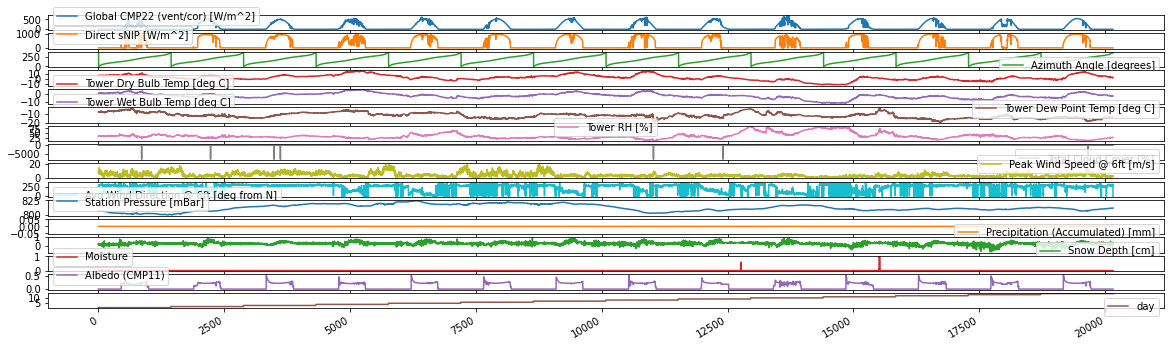

In [27]:
df[:1440*14].plot(subplots=True)

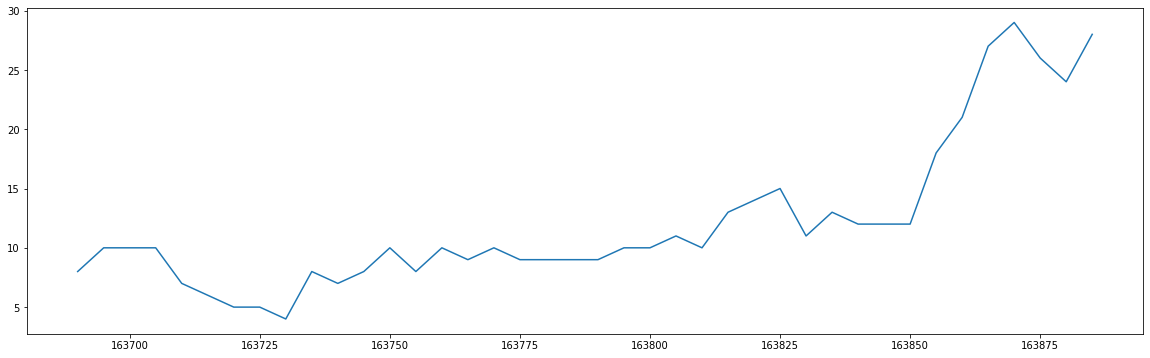

In [28]:
cleaned_df[cleaned_df['day'] ==  225]['Total Cloud Cover [%]'][:200][::5].plot()

In [29]:
cleaned_df.loc[106079-5 : 106079+5]

,MST,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Total Cloud Cover [%],Station Pressure [mBar],Precipitation (Accumulated) [mm],Snow Depth [cm],Moisture,Albedo (CMP11),day,Wind_x,Wind_y
106074,06:20,266.443,681.210,75.32803,19.39,10.436,3.266,34.30,8.0,816.861,0.0,0.686,0.0,0.2373,156,0.000000,0.000000
106075,06:21,269.830,684.717,75.47192,19.41,10.429,3.329,34.41,8.0,816.861,0.0,0.687,0.0,0.2363,156,0.000000,0.000000
106076,06:22,273.337,688.485,75.61580,19.44,10.513,3.413,34.55,9.0,816.854,0.0,0.680,0.0,0.2353,156,0.000000,0.000000
106077,06:23,276.612,691.507,75.75966,19.50,10.512,3.342,34.25,9.0,816.852,0.0,0.666,0.0,0.2348,156,0.000000,0.000000
106078,06:24,279.757,694.421,75.90351,19.55,10.527,3.427,34.35,9.0,816.838,0.0,0.655,0.0,0.2340,156,0.000000,0.000000
106079,06:25,283.031,697.369,76.04735,19.58,10.607,3.507,34.48,9.0,816.845,0.0,0.711,0.0,0.2335,156,0.392661,-1.133939
106080,06:26,286.363,700.188,76.19118,19.63,10.552,3.452,34.24,9.0,816.845,0.0,0.747,0.0,0.2328,156,0.191857,-1.184564
106081,06:27,289.451,701.853,76.33500,19.67,10.512,3.212,33.58,8.0,816.845,0.0,0.768,0.0,0.2324,156,0.226607,-0.922578
106082,06:28,292.859,705.025,76.47882,19.75,10.654,3.554,34.23,9.0,816.847,0.0,0.725,0.0,0.2323,156,0.269815,-0.910879
106083,06:29,296.115,707.278,76.62265,19.85,10.894,4.094,35.34,9.0,816.844,0.0,0.678,0.0,0.2316,156,-0.052502,-0.446927


In [30]:
# Split into Train and Validation data
X = list(range(1,367))
from sklearn.utils import shuffle
X = shuffle(X, random_state = 999)
n = 366

train_days = X[0:int(n*0.85)]
val_days = X[int(n*0.85):int(n*0.95)]
test_days = X[int(n*0.95):]

def get_dataframe(dataf,days_list):
  indexes_list = []
  for day in days_list:
    indexes_list = np.append(indexes_list, dataf[dataf['day'] == day].index)
  return dataf.iloc[np.array(indexes_list).astype('int64')]

In [31]:
train_df = get_dataframe(cleaned_df, train_days).drop(['MST'], axis = 1)
val_df = get_dataframe(cleaned_df, val_days).drop(['MST'], axis = 1)
test_df = get_dataframe(cleaned_df, test_days).drop(['MST'], axis = 1)

a = train_df['day']
b = val_df['day']
c = test_df['day']

In [32]:
# Normalize the data
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df- train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std
train_df['day'] = a
val_df['day'] = b
test_df['day'] = c

In [33]:
train_std

Global CMP22 (vent/cor) [W/m^2]     297.906455
Direct sNIP [W/m^2]                 397.259791
Azimuth Angle [degrees]              64.372335
Tower Dry Bulb Temp [deg C]          10.705784
Tower Wet Bulb Temp [deg C]           6.649442
Tower Dew Point Temp [deg C]          7.039930
Tower RH [%]                         22.322874
Total Cloud Cover [%]                35.785054
Station Pressure [mBar]               4.998539
Precipitation (Accumulated) [mm]      1.691374
Snow Depth [cm]                       3.547683
Moisture                              0.219703
Albedo (CMP11)                        0.178639
day                                  96.453559
Wind_x                                1.914352
Wind_y                                3.056864
dtype: float64

In [34]:
train_df

,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Total Cloud Cover [%],Station Pressure [mBar],Precipitation (Accumulated) [mm],Snow Depth [cm],Moisture,Albedo (CMP11),day,Wind_x,Wind_y
81190,-1.251964,-0.427664,-1.694957,-0.665313,-0.901709,-1.348611,-0.658265,-1.267467,0.956526,-0.195194,-0.267109,-0.242004,0.811902,126,0.912731,-1.151978
81191,-1.246193,-0.370405,-1.692533,-0.680258,-0.907875,-1.354435,-0.651545,-1.239523,0.955926,-0.195194,-0.253298,-0.242004,0.799027,126,0.209232,-1.245670
81192,-1.237577,-0.335448,-1.690112,-0.687730,-0.946675,-1.462106,-0.708886,-1.267467,0.957326,-0.195194,-0.201151,-0.242004,0.739689,126,0.149671,-1.253055
81193,-1.229341,-0.305012,-1.687694,-0.667181,-0.944870,-1.545630,-0.767122,-1.295412,0.957326,-0.195194,-0.176910,-0.242004,0.690428,126,-0.190989,-0.945423
81194,-1.220958,-0.276416,-1.685278,-0.645697,-0.912687,-1.472618,-0.741140,-1.267467,0.958126,-0.195194,-0.242305,-0.242004,0.680351,126,-0.192083,-1.436125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7889,-1.323451,-1.232650,0.907295,-1.230521,-1.403104,-1.367645,-0.186552,-1.323357,0.713255,-0.195194,-0.351954,-0.242004,-0.845633,15,1.049642,-1.291292
7890,-1.325675,-1.234691,0.909868,-1.236126,-1.409721,-1.373895,-0.186104,-1.323357,0.727259,-0.195194,-0.352235,-0.242004,-0.853470,15,1.571129,0.428210
7891,-1.327969,-1.236135,0.912437,-1.243972,-1.403856,-1.368355,-0.172664,-1.323357,0.735061,-0.195194,-0.356464,-0.242004,-0.847872,15,1.857272,0.066011
7892,-1.330265,-1.237343,0.915000,-1.250977,-1.414383,-1.378299,-0.174008,-1.323357,0.720857,-0.195194,-0.347162,-0.242004,-0.844513,15,2.518042,0.476324


In [35]:
def create_submission(x,path):
  x.index = list(range(1,301))
  x.to_csv(path,header=['30_min_horizon', '60_min_horizon', '90_min_horizon', '120_min_horizon'], index=True, index_label = 'scenario_set')

In [36]:
#@title Default title text
# # Baseline Model
# import os
# tcc_list = np.array([])
# for i in range(1,301):
#   t_df = pd.read_csv(os.path.join('/content/drive/MyDrive/Shell_ai/dataset/test', str(i), "weather_data.csv"))
#   tcc_list 
#   t_df['Total Cloud Cover [%]'].replace(-7999, np.NaN, inplace  = True)
#   t_df['Total Cloud Cover [%]'].replace(-1, np.NaN, inplace  = True)
#   t_df['Total Cloud Cover [%]'].replace(-6999, np.NaN, inplace  = True) 
#   t_df['Total Cloud Cover [%]'].fillna(method="ffill", inplace=True)
#   tcc_list = np.append(tcc_list, t_df['Total Cloud Cover [%]'].iloc[-1])  
# y = pd.DataFrame([[tcc_list.astype('int64')[j] for i in range(4)] for j in range(len(tcc_list))] )
# create_submission(y,'/content/sub.csv')

In [37]:
#@title Default title text
# ARIMA Model
# !pip install statsmodels
# from statsmodels.tsa.arima_model import ARIMA

# # from statsmodels.tsa.arima.model import ARIMA
# model = ARIMA(series, order=(10,1,1))
# model_fit = model.fit()
# output = model_fit.forecast()[0]

	# yhat = output[0]
	# predictions.append(yhat)
	# obs = test[t]
	# history.append(obs)
	# print('predicted=%f, expected=%f' % (yhat, obs))

In [38]:
#@title Default title text
# from sklearn.metrics import mean_absolute_error
# from statsmodels.tsa.arima_model import ARIMA
# import warnings
# # !pip install statsmodels

# # evaluate an ARIMA model for a given order (p,d,q)
# def evaluate_arima_model(X, arima_order):
# 	# prepare training dataset
# 	train_size = int(len(X) * 0.66)
# 	train, test = X[0:train_size], X[train_size:]
# 	history = [x for x in train]
# 	# make predictions
# 	predictions = list()
# 	for t in range(len(test)):
# 		model = ARIMA(history, order=arima_order)
# 		model_fit = model.fit()
# 		yhat = model_fit.forecast()[0]
# 		predictions.append(yhat)
# 		history.append(test[t])
# 	# calculate out of sample error
# 	mae = mean_absolute_error(test, predictions)
# 	return mae
 
# # evaluate combinations of p, d and q values for an ARIMA model
# def evaluate_models(dataset, p_values, d_values, q_values):
# 	dataset = dataset.astype('float32')
# 	best_score, best_cfg = float("inf"), None
# 	for p in p_values:
# 		for d in d_values:
# 			for q in q_values:
# 				order = (p,d,q)
# 				try:
# 					rmse = evaluate_arima_model(dataset, order)
# 					if rmse < best_score:
# 						best_score, best_cfg = rmse, order
# 					print('ARIMA%s RMSE=%.3f' % (order,rmse))
# 				except:
# 					continue
# 	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
 
# # load dataset
# series = cleaned_df[cleaned_df['day'] == 1]['Total Cloud Cover [%]'][0::5]
# # evaluate parameters
# p_values = [0, 1, 2, 4, 6, 8, 10]
# d_values = range(0, 3)
# q_values = range(0, 3)
# warnings.filterwarnings("ignore")
# evaluate_models(series.values, p_values, d_values, q_values)

In [39]:
#@title
# #@title
# output = []
# for i in range(300):
#   series = test_data[i]
#   model = ARIMA(series, order=(1,0,0))
#   model_fit = model.fit()
#   output.append(model_fit.forecast(steps = 120)[0][29::30])

In [40]:
#@title
# #@title
# for i in range(300):
#   for j in range(4):
#     output[i][j] = round(output[i][j])

In [41]:
#@title
# create_submission(pd.DataFrame(np.array(output).astype('int64')),'/content/sub.csv')

In [42]:
#@title Default title text
# # @title Default title text
# #Ensembling
# df_nn = pd.read_csv('/content/sub.csv')
# df_loocf = pd.read_csv('/content/sub3.csv')
# x = (df_nn + df_loocf) / 2
# create_submission(x.drop('scenario_set', axis = 1),'/content/sub1.csv' )

##Using Deep Learning Models

In [43]:
# extract test data
import os
test_data = []*300
for i in range(1,301):
  t_df = pd.read_csv(os.path.join('/content/drive/MyDrive/Shell_ai/dataset/test', str(i), "weather_data.csv")) 
  t_df['Total Cloud Cover [%]'].replace(-7999, np.NaN, inplace  = True)
  t_df['Total Cloud Cover [%]'].replace(-1, np.NaN, inplace  = True)
  t_df['Total Cloud Cover [%]'].replace(-6999, np.NaN, inplace  = True) 
  t_df['Total Cloud Cover [%]'].fillna(method="ffill", inplace=True)
  t_df['Total Cloud Cover [%]'].fillna(method='backfill', inplace=True)
  t_df.drop('Time [Mins]', axis = 1, inplace = True)
  wv = t_df.pop('Peak Wind Speed @ 6ft [m/s]')
  # Convert to radians.
  wd_rad = t_df.pop('Avg Wind Direction @ 6ft [deg from N]')*np.pi / 180
  # Calculate the wind x and y components.
  t_df['Wind_x'] = wv*np.cos(wd_rad)
  t_df['Wind_y'] = wv*np.sin(wd_rad)
  t_df = (t_df- train_mean.drop('day')) / train_std.drop('day')
  test_data.append(t_df)

In [44]:
# plt.rcParams['figure.figsize'] = [18, 18]
# cleaned_df.hist()
# plt.title('Distribution of Features')
# plt.show()

In [45]:
# train_df['tcc_30'] = series.shift(-30)
# train_df['tcc_60'] = series.shift(-60)
# train_df['tcc_90'] = series.shift(-90)
# train_df['tcc_120'] = series.shift(-120)

In [46]:
# # Plotting correlation between every pair of columns
# plt.rcParams['figure.figsize'] = [20, 20]
# sns.heatmap(train_df.drop(['30','x'] , axis = 1).corr(),annot = True,cmap = "YlGnBu")
# plt.title('Correlation Matrix')
# plt.show()

In [47]:
import tensorflow as tf
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [48]:
#@title Default title text
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,label_shift,
               train_df = train_df, val_df = val_df, test_df = test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift
    self.label_shift = label_shift
    self.total_window_size = input_width + shift + label_shift*(label_width - 1)

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.input_width + self.shift - 1
    self.labels_slice = slice(self.label_start, None, label_shift)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
    
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=64,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

import random
def chain(iterables):
  while True:
    random.shuffle(iterables)
    for it in iterables:
      lst = list(it)
      random.shuffle(lst)
      for element in lst:
          yield element

In [226]:
def get_test_predictions(model, ws,features_list,srate) :

  X = np.zeros((300,ws,len(features_list)))
  for i in range(300):  
    X[i] = np.array(test_data[i][::srate][-ws:][['Total Cloud Cover [%]']])
  output = model.predict(X)
  output = output.reshape(300,4)
  output = pd.DataFrame(output.reshape(300,4))
  output = output*train_std.loc['Total Cloud Cover [%]'] + train_mean.loc['Total Cloud Cover [%]']
  for i in range(300):
    for j in range(4):
      if(output.iloc[i][j] > 100):
          output.iloc[i][j] = 100
  create_submission(pd.DataFrame(np.array(output)),'/content/sub4.csv')
  return output

In [50]:
# plt.rcParams['figure.figsize'] = [18, 7]
# test_data[34]['Total Cloud Cover [%]'].plot()

In [51]:
#@title Default title text
# for ws in [5]:
#   print("\n\nfor ws = {}".format(ws))
#   grouped_df1 = train_df.groupby(['day'], sort = False, as_index = False)
#   iter_list_train = [ WindowGenerator(input_width=ws, label_width = 4, shift=30, label_shift = 30,train_df = grouped_df1.get_group(day).drop('day' , axis = 1)[['Total Cloud Cover [%]']], label_columns=['Total Cloud Cover [%]']).train for day in train_df['day'].unique() ]
#   # train_generator = itertools.chain.from_iterable( iter_list )

#   grouped_df1 = val_df.groupby(['day'], sort = False, as_index = False)
#   iter_list_val = [ WindowGenerator(input_width=ws, label_width = 4, shift=30, label_shift = 30,train_df = grouped_df1.get_group(day).drop('day' , axis = 1)[['Total Cloud Cover [%]']], label_columns=['Total Cloud Cover [%]']).train for day in val_df['day'].unique() ]
#   # val_generator = itertools.chain.from_iterable( iter_list )

#   grouped_df1 = test_df.groupby(['day'], sort = False, as_index = False)
#   iter_list_test = [ WindowGenerator(input_width=ws, label_width = 4, shift=30, label_shift = 30,train_df = grouped_df1.get_group(day).drop('day' , axis = 1)[['Total Cloud Cover [%]']], label_columns=['Total Cloud Cover [%]']).train for day in test_df['day'].unique() ]
#   # test_generator = itertools.chain.from_iterable( iter_list )

#   train_batches = 0
#   for x in iter_list_train:
#     train_batches = train_batches + len(x)
#   print(train_batches)
#   val_batches = 0
#   for x in iter_list_val:
#     val_batches = val_batches + len(x)
#   print(val_batches)

#   test_batches = 0
#   for x in iter_list_test:
#     test_batches = test_batches + len(x)
#   print(test_batches)

#   train_gen = chain(iter_list_train)
#   val_gen = chain(iter_list_val)
#   test_gen = chain(iter_list_test)

#   # Linear Model
#   linear = tf.keras.Sequential([
#     tf.keras.layers.Flatten(input_shape=(ws, 1)),
#     tf.keras.layers.Dense(units=4)
# ])

#   from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

#   callbacks = [
#       EarlyStopping(monitor='val_loss', patience=3,  mode='min',verbose=1),
#       ReduceLROnPlateau(factor=0.1, patience=5, min_lr=1e-9, verbose=1),
#       ModelCheckpoint('linear_{}.h5'.format(ws), verbose=1, save_best_only=True, save_weights_only=True) ]

#   linear.compile(loss=tf.keras.losses.MeanAbsoluteError(),
#                 optimizer=tf.optimizers.SGD(learning_rate=1e-2, momentum = 0.9),
#                 metrics=[tf.metrics.MeanAbsoluteError()])

#   history = linear.fit(train_gen, steps_per_epoch = train_batches, epochs=20, validation_data = val_gen, validation_steps = val_batches, callbacks=callbacks)
#   linear.evaluate(test_gen, steps = test_batches)

In [52]:
class ResidualWrapper(tf.keras.Model):
  def __init__(self, model):
    super().__init__()
    self.model = model

  def call(self, inputs, *args, **kwargs):
    delta = self.model(inputs, *args, **kwargs)

    # The prediction for each time step is the input
    # from the previous time step plus the delta
    # calculated by the model.
    return tf.stack([inputs[:,-1,-1], inputs[:,-1,-1], inputs[:,-1,-1], inputs[:,-1,-1]], axis=1)+ delta

### MLP

In [53]:
%%capture
!pip install wandb

In [164]:
import wandb
from wandb.keras import WandbCallback

wandb.login()

 927/2913 [========>.....................] - ETA: 5:19 - loss: 0.3703

True

 931/2913 [========>.....................] - ETA: 5:19 - loss: 0.3706

In [248]:
def resModel(units_1,units_2):

    mlp_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units = units_1, activation='relu', return_sequences = True),
    tf.keras.layers.LSTM(units = units_2, activation='relu'),
    tf.keras.layers.Dense(units=4,kernel_initializer=tf.initializers.zeros()),

  ])
    return ResidualWrapper(mlp_model)

In [175]:
# def Model(units_1,units_2):

#     mlp_model = tf.keras.Sequential([
#     tf.keras.layers.LSTM(units = units_1, activation='relu', return_sequences = True),
#     tf.keras.layers.LSTM(units = units_2, activation='relu', return_sequences = True),
#     tf.keras.layers.Dense(units=4),
#   ])
#     return mlp_model

In [249]:
sweep_config = {
  'method': 'bayes', 
  'metric': {
      'name': 'val_loss',
      'goal': 'minimize'
  },

  'early_terminate':{
      'type': 'hyperband',
      'min_iter': 2,
      'eta': 2
  },
  'parameters': {
      'learning_rate':{
          'values': [0.01, 0.005, 0.001, 0.0005, 0.0001]
      },
      'sr_nd_ws':{
          'values': [[6,1],[10,1],[6,20],[30,1]]
      },
      'units_1':{
          'values': [100,50]
      },
      'units_2':{
          'values': [50]
      },
   
      'cols_list':{
          'values': [ ['Total Cloud Cover [%]'] ,['Azimuth Angle [degrees]','Tower Dew Point Temp [deg C]',
       'Tower RH [%]', 'Total Cloud Cover [%]', 'Moisture'],['Azimuth Angle [degrees]', 'Total Cloud Cover [%]']]
      }
  }
}
          # 'values': [[15,4],[10,1], [10,3], [10,9],[10,12], [6,1], [6,5], [6,10], [6,20]]


In [250]:
def sweep_train():
    # Specify the hyperparameter to be tuned along with
    # an initial value
    config_defaults = {
        'learning_rate': 0.01,
        'sr nd ws': [10,1],
      'units_1':100,
      'units_2': 50,
      'cols_list': ['Total Cloud Cover [%]']
    }

    # Initialize wandb with a sample project name
    wandb.init(config=config_defaults)  # this gets over-written in the Sweep
    cfg = wandb.config
    # Specify the other hyperparameters to the configuration, if any
    cfg.epochs = 45
    cfg.architecture_name = "resLSTM"

    grouped_df1 = train_df.groupby(['day'], sort = False, as_index = False)
    iter_list_train = [ WindowGenerator(input_width=cfg.sr_nd_ws[1], label_width = 4, shift=30//cfg.sr_nd_ws[0], label_shift = 30//cfg.sr_nd_ws[0],train_df = grouped_df1.get_group(day)[::cfg.sr_nd_ws[0]].drop('day' , axis = 1)[cfg.cols_list], label_columns=['Total Cloud Cover [%]']).train for day in train_df['day'].unique() ]

    grouped_df1 = val_df.groupby(['day'], sort = False, as_index = False)
    iter_list_val = [ WindowGenerator(input_width=cfg.sr_nd_ws[1], label_width = 4, shift=30//cfg.sr_nd_ws[0], label_shift = 30//cfg.sr_nd_ws[0],train_df = grouped_df1.get_group(day)[::cfg.sr_nd_ws[0]].drop('day' , axis = 1)[cfg.cols_list], label_columns=['Total Cloud Cover [%]']).train for day in val_df['day'].unique() ]

    grouped_df1 = test_df.groupby(['day'], sort = False, as_index = False)
    iter_list_test = [ WindowGenerator(input_width=cfg.sr_nd_ws[1], label_width = 4, shift=30//cfg.sr_nd_ws[0], label_shift = 30//cfg.sr_nd_ws[0],train_df = grouped_df1.get_group(day)[::cfg.sr_nd_ws[0]].drop('day' , axis = 1)[cfg.cols_list], label_columns=['Total Cloud Cover [%]']).train for day in test_df['day'].unique() ]

    train_batches = 0
    for x in iter_list_train:
      train_batches = train_batches + len(x)
    print(train_batches)
    val_batches = 0
    for x in iter_list_val:
      val_batches = val_batches + len(x)
    print(val_batches)

    test_batches = 0
    for x in iter_list_test:
      test_batches = test_batches + len(x)
    print(test_batches)

    train_gen = chain(iter_list_train)
    val_gen = chain(iter_list_val)
    test_gen = chain(iter_list_test)
     
    # initialize model
    model = resModel(cfg.units_1, cfg.units_2)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = cfg.learning_rate),loss=tf.keras.losses.MeanAbsoluteError())

    callbacks = [
        EarlyStopping(monitor='val_loss', patience = 5,  mode='min'),
        ReduceLROnPlateau(factor=0.1, patience = 3, verbose=1),
        ModelCheckpoint('/content/drive/MyDrive/LSTM_l:{}_sr:{}_ws:{}_u1:{}_u2:{}_cols:{}.h5'.format(cfg.learning_rate, cfg.sr_nd_ws[0],cfg.sr_nd_ws[1], cfg.units_1, cfg.units_2,len(cfg.cols_list)), verbose=1, save_best_only=True, save_weights_only=True) ]
  
    # train and validate
    history = model.fit(train_gen, steps_per_epoch = train_batches, epochs=cfg.epochs, validation_data = val_gen, validation_steps = val_batches,callbacks = [WandbCallback(),callbacks])

In [255]:
sweep_id = wandb.sweep(sweep_config, project="shell.ai-hackathon")

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


Create sweep with ID: r3g2nm0x
Sweep URL: https://wandb.ai/akhila/shell.ai-hackathon/sweeps/r3g2nm0x
  3/311 [..............................] - ETA: 11s - loss: 0.3997  

In [256]:
wandb.agent(sweep_id, function=sweep_train, count = 360)

 34/311 [==>...........................] - ETA: 15s - loss: 0.3851

wandb: Agent Starting Run: 6ktz0ted with config:
wandb: 	cols_list: ['Total Cloud Cover [%]']
wandb: 	learning_rate: 0.01
wandb: 	sr_nd_ws: [30, 1]
wandb: 	units_1: 50
wandb: 	units_2: 50


111/311 [=========>....................] - ETA: 9s - loss: 0.4006

Exception in thread Thread-388:
Traceback (most recent call last):
  File "/usr/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/wandb/sdk/wandb_run.py", line 167, in check_status
    status_response = self._interface.communicate_stop_status()
  File "/usr/local/lib/python3.7/dist-packages/wandb/sdk/interface/interface.py", line 109, in communicate_stop_status
    resp = self._communicate_stop_status(status)
  File "/usr/local/lib/python3.7/dist-packages/wandb/sdk/interface/interface_queue.py", line 401, in _communicate_stop_status
    resp = self._communicate(req, local=True)
  File "/usr/local/lib/python3.7/dist-packages/wandb/sdk/interface/interface_queue.py", line 232, in _communicate
    return self._communicate_async(rec, local=local).get(timeout=timeout)
  File "/usr/local/lib/python3.7/dist-packages/wand

274/311 [=========================>....] - ETA: 2s - loss: 0.3905

311/311 [==============================] - 26s 75ms/step - loss: 0.3934 - val_loss: 0.3867


wandb: ERROR Can't save model, h5py returned error: Saving the model to HDF5 format requires the model to be a Functional model or a Sequential model. It does not work for subclassed models, because such models are defined via the body of a Python method, which isn't safely serializable. Consider saving to the Tensorflow SavedModel format (by setting save_format="tf") or using `save_weights`.



Epoch 00001: val_loss improved from inf to 0.38673, saving model to /content/drive/MyDrive/LSTM_l:0.0001_sr:30_ws:1_u1:50_u2:50_cols:1.h5
Epoch 2/45
311/311 [==============================] - 28s 91ms/step - loss: 0.3887 - val_loss: 0.3838

Epoch 00002: val_loss improved from 0.38673 to 0.38382, saving model to /content/drive/MyDrive/LSTM_l:0.0001_sr:30_ws:1_u1:50_u2:50_cols:1.h5
Epoch 3/45
 64/311 [=====>........................] - ETA: 20s - loss: 0.3673311
36
19
311/311 [==============================] - 31s 100ms/step - loss: 0.3863 - val_loss: 0.4074

202/311 [==================>...........] - ETA: 10s - loss: 0.3915
Epoch 4/45
311/311 [==============================] - 40s 109ms/step - loss: 0.3875 - val_loss: 0.3860

Epoch 00001: val_loss improved from inf to 0.38604, saving model to /content/drive/MyDrive/LSTM_l:0.01_sr:30_ws:1_u1:50_u2:50_cols:1.h5
Epoch 2/45
311/311 [==============================] - 32s 105ms/step - loss: 0.3853 - val_loss: 0.3680

Epoch 00004: val_loss imp

wandb: ERROR Can't save model, h5py returned error: Saving the model to HDF5 format requires the model to be a Functional model or a Sequential model. It does not work for subclassed models, because such models are defined via the body of a Python method, which isn't safely serializable. Consider saving to the Tensorflow SavedModel format (by setting save_format="tf") or using `save_weights`.


177/311 [================>.............] - ETA: 12s - loss: 0.3875
Epoch 00002: val_loss improved from 0.38604 to 0.37309, saving model to /content/drive/MyDrive/LSTM_l:0.01_sr:30_ws:1_u1:50_u2:50_cols:1.h5
Epoch 3/45
311/311 [==============================] - 33s 106ms/step - loss: 0.3851 - val_loss: 0.3616

Epoch 00005: val_loss improved from 0.36802 to 0.36162, saving model to /content/drive/MyDrive/LSTM_l:0.0001_sr:30_ws:1_u1:50_u2:50_cols:1.h5
311/311 [==============================] - 33s 106ms/step - loss: 0.3861 - val_loss: 0.4078

Epoch 00003: val_loss did not improve from 0.37309
Epoch 4/45
295/311 [===========================>..] - ETA: 1s - loss: 0.3862

wandb: Ctrl + C detected. Stopping sweep.


In [61]:
cols = 

In [246]:
model = ResidualWrapper(tf.keras.Sequential([
    tf.keras.layers.LSTM(units = 512, activation='relu',return_sequences = True, input_shape = (3,1)),
    tf.keras.layers.LSTM(units = 1028, activation='relu',return_sequences = True),
    tf.keras.layers.LSTM(units = 256, activation='relu'),
    tf.keras.layers.Dense(units = 256, activation='relu'),
    tf.keras.layers.Dense(units=4,kernel_initializer=tf.initializers.zeros()),
  ]))
    
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate = 0.001),loss=tf.keras.losses.MeanAbsoluteError())

In [222]:
grouped_df1 = test_df.groupby(['day'], sort = False, as_index = False)

iter_list_test = [ WindowGenerator(input_width=3, label_width = 4, shift=30//10, label_shift = 30//10,train_df = grouped_df1.get_group(day)[::10].drop('day' , axis = 1)[['Total Cloud Cover [%]']], label_columns=['Total Cloud Cover [%]']).train for day in test_df['day'].unique() ]
test_gen = chain(iter_list_test)

In [242]:
grouped_df1 = val_df.groupby(['day'], sort = False, as_index = False)

iter_list_val = [ WindowGenerator(input_width=3, label_width = 4, shift=30, label_shift = 30,train_df = grouped_df1.get_group(day)[::1].drop('day' , axis = 1)[['Total Cloud Cover [%]']], label_columns=['Total Cloud Cover [%]']).train for day in val_df['day'].unique() ]
val_gen = chain(iter_list_val)

In [129]:
x, y = next(iter(test_gen))

In [130]:
x.shape

TensorShape([38, 20, 1])

In [243]:
test_batches = 0
for x in iter_list_val:
    test_batches = test_batches + len(x)
print(test_batches)

323


In [221]:
model.built = True
model.load_weights('/content/drive/MyDrive/LSTM_l:0.001_sr:10_ws:3_u1:512_u2:1028_u3:256_u4:256.h5')


In [245]:
model.evaluate(val_gen, steps = 323 )

323/323 [==============================] - 6s 20ms/step - loss: 0.3740


0.3740215301513672

In [227]:
get_test_predictions(model, 3,['Total Cloud Cover [%]'],10)

,0,1,2,3
0,99.103241,99.858452,99.894211,99.836502
1,38.226555,38.997066,39.082863,39.076885
2,98.106445,98.861984,98.898682,98.842758
3,53.215878,53.985905,54.066227,54.057987
4,20.232435,20.996252,21.095928,21.092121
...,...,...,...,...
295,10.268517,11.015041,11.170441,11.172733
296,54.179558,54.948822,55.009415,54.985146
297,13.268646,14.015106,14.170822,14.173363
298,37.242874,38.008133,38.115498,38.114548


In [101]:
model1.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 1)                 0         
_________________________________________________________________
dense_24 (Dense)             (None, 128)               256       
_________________________________________________________________
dense_25 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_26 (Dense)             (None, 4)                 260       
Total params: 8,772
Trainable params: 8,772
Non-trainable params: 0
_________________________________________________________________


### Residual MLP

In [ ]:
for ws in [30]:
  sr = 30
  print("\n\nfor ws = {}".format(ws))
  grouped_df1 = train_df.groupby(['day'], sort = False, as_index = False)
  iter_list_train = [ WindowGenerator(input_width=ws, label_width = 4, shift=30//sr, label_shift = 30//sr,train_df = grouped_df1.get_group(day)[::sr].drop('day' , axis = 1)[['Total Cloud Cover [%]']], label_columns=['Total Cloud Cover [%]']).train for day in train_df['day'].unique() ]
  # train_generator = itertools.chain.from_iterable( iter_list )

  grouped_df1 = val_df.groupby(['day'], sort = False, as_index = False)
  iter_list_val = [ WindowGenerator(input_width=ws, label_width = 4, shift=30//sr, label_shift = 30//sr,train_df = grouped_df1.get_group(day)[::sr].drop('day' , axis = 1)[['Total Cloud Cover [%]']], label_columns=['Total Cloud Cover [%]']).train for day in val_df['day'].unique() ]
  # val_generator = itertools.chain.from_iterable( iter_list )

  grouped_df1 = test_df.groupby(['day'], sort = False, as_index = False)
  iter_list_test = [ WindowGenerator(input_width=ws, label_width = 4, shift=30//sr, label_shift = 30//sr,train_df = grouped_df1.get_group(day)[::sr].drop('day' , axis = 1)[['Total Cloud Cover [%]']], label_columns=['Total Cloud Cover [%]']).train for day in test_df['day'].unique() ]
  # test_generator = itertools.chain.from_iterable( iter_list )

  train_batches = 0
  for x in iter_list_train:
    train_batches = train_batches + len(x)
  print(train_batches)
  val_batches = 0
  for x in iter_list_val:
    val_batches = val_batches + len(x)
  print(val_batches)

  test_batches = 0
  for x in iter_list_test:
    test_batches = test_batches + len(x)
  print(test_batches)

  train_gen = chain(iter_list_train)
  val_gen = chain(iter_list_val)
  test_gen = chain(iter_list_test)

  # Linear Model
  linear =   tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=4),
])

  from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

  callbacks = [
      EarlyStopping(monitor='val_loss', patience = 4,  mode='min',verbose=1),
      ReduceLROnPlateau(factor=0.1, patience = 3, verbose=1),
      ModelCheckpoint('conv_{}.h5'.format(ws), verbose=1, save_best_only=True, save_weights_only=True) ]

  linear.compile(loss=tf.keras.losses.MeanAbsoluteError(),
                optimizer=tf.optimizers.Adam())

  history = linear.fit(train_gen, steps_per_epoch = train_batches, epochs=40, validation_data = val_gen, validation_steps = val_batches, callbacks=callbacks)
  linear.evaluate(test_gen, steps = test_batches)

### CNN

### Residual CNN

In [ ]:
for ws in [5]:
  sr = 3
  print("\n\nfor ws = {}".format(ws))
  grouped_df1 = train_df.groupby(['day'], sort = False, as_index = False)
  iter_list_train = [ WindowGenerator(input_width=ws, label_width = 4, shift=30//sr, label_shift = 30//sr,train_df = grouped_df1.get_group(day)[::sr].drop('day' , axis = 1)[['Total Cloud Cover [%]']], label_columns=['Total Cloud Cover [%]']).train for day in train_df['day'].unique() ]
  # train_generator = itertools.chain.from_iterable( iter_list )

  grouped_df1 = val_df.groupby(['day'], sort = False, as_index = False)
  iter_list_val = [ WindowGenerator(input_width=ws, label_width = 4, shift=30//sr, label_shift = 30//sr,train_df = grouped_df1.get_group(day)[::sr].drop('day' , axis = 1)[['Total Cloud Cover [%]']], label_columns=['Total Cloud Cover [%]']).train for day in val_df['day'].unique() ]
  # val_generator = itertools.chain.from_iterable( iter_list )

  grouped_df1 = test_df.groupby(['day'], sort = False, as_index = False)
  iter_list_test = [ WindowGenerator(input_width=ws, label_width = 4, shift=30//sr, label_shift = 30//sr,train_df = grouped_df1.get_group(day)[::sr].drop('day' , axis = 1)[['Total Cloud Cover [%]']], label_columns=['Total Cloud Cover [%]']).train for day in test_df['day'].unique() ]
  # test_generator = itertools.chain.from_iterable( iter_list )

  train_batches = 0
  for x in iter_list_train:
    train_batches = train_batches + len(x)
  print(train_batches)
  val_batches = 0
  for x in iter_list_val:
    val_batches = val_batches + len(x)
  print(val_batches)

  test_batches = 0
  for x in iter_list_test:
    test_batches = test_batches + len(x)
  print(test_batches)

  train_gen = chain(iter_list_train)
  val_gen = chain(iter_list_val)
  test_gen = chain(iter_list_test)

  # Linear Model
  linear =   ResidualWrapper(tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(2,),
                           activation='relu'),
    
    tf.keras.layers.Dropout(0.7),
    tf.keras.layers.MaxPooling1D(pool_size = 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=4),
]))

  from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

  callbacks = [
      EarlyStopping(monitor='val_loss', patience=3,  mode='min',verbose=1),
      ReduceLROnPlateau(factor=0.1, patience=2, verbose=1),
      ModelCheckpoint('conv_{}.h5'.format(ws), verbose=1, save_best_only=True, save_weights_only=True) ]

  linear.compile(loss=tf.keras.losses.MeanAbsoluteError(),
                optimizer=tf.optimizers.Adam())

  history = linear.fit(train_gen, steps_per_epoch = train_batches, epochs=40, validation_data = val_gen, validation_steps = val_batches, callbacks=callbacks)
  linear.evaluate(test_gen, steps = test_batches)

In [ ]:
linear.load_weights('/content/conv_{}.h5'.format(ws))
get_test_predictions(linear,ws,['Total Cloud Cover [%]'], sr)

In [144]:
dfs = []
for i in range(11,13):
  df = pd.read_csv('sub3 ({}).csv'.format(i))
  dfs.append(df)

In [260]:
d = df + df2
d = d/2

In [145]:
df = dfs[0]
for i in range(1,2):
  df = df + dfs[i]
d = df/2

In [259]:
df = pd.read_csv('sub3 (3).csv')
df2 = pd.read_csv('l1.csv')

In [261]:
create_submission(d.drop('scenario_set',axis = 1),'/content/ens11.csv')